In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.constants
import scipy.optimize as opt

In [2]:
sigma_c = 10
delta_c = 1
k = 1
dh = np.linspace(0,15,50)
e = np.e

cohesive_energy = lambda x: -sigma_c * (delta_c + x) * e ** (1.0 - x / delta_c)
cohesive_traction = lambda x: (sigma_c/delta_c) * x * e ** (1.0 - x / delta_c)
d_cohesive_traction = lambda x: (sigma_c / delta_c) * e ** (1.0 - x / delta_c) * (1.0 - x / delta_c)

elastic_energy = lambda x, d_h: 0.5 * -k * (x - d_h)**2
elastic_traction = lambda x, d_h: -k * (x - d_h)
d_elastic_traction = lambda x: -k

root_function = lambda x, d_h: cohesive_traction(x) - elastic_traction(x,d_h)
integral_function = lambda x, d_h: cohesive_energy(x) - elastic_energy(x, d_h) 
residual_function = lambda x: d_cohesive_traction(x) - d_elastic_traction(x)

/tmp/ipykernel_150907/1547638910.py:42: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  root.set_xdata(newton_raphson[frame])
/tmp/ipykernel_150907/1547638910.py:43: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  root.set_ydata(cohesive_traction(newton_raphson[frame]))


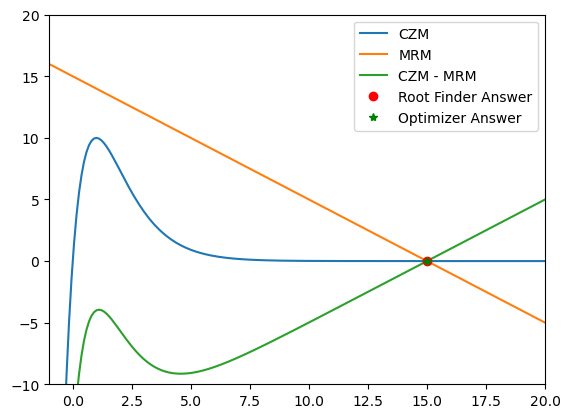

In [3]:
fig, ax = plt.subplots()
ax.set(xlim=[-1,20], ylim=[-10,20])

xs = np.linspace(-1,20,200)
CZMy = cohesive_traction(xs)
MRMy = []
rootfn = []
for num in dh:
    MRMy.append(elastic_traction(xs, num))
    rootfn.append(root_function(xs, num))

CZM = ax.plot(xs, CZMy, label=f'CZM')
MRM = ax.plot(xs, MRMy[0], label=f'MRM')[0]
Root_M = ax.plot(xs, rootfn[0], label=f'CZM - MRM')[0]

rootfun = lambda x: root_function(x, dh[0])  
drootfun = lambda x: residual_function(x)
newton_raphson = [opt.newton(rootfun, 2.0, drootfun, maxiter=10, disp=False)]
root = ax.plot(newton_raphson[0], cohesive_traction(newton_raphson[0]), 'ro', label=f'Root Finder Answer')[0]
for num in dh[1:]:
    previous_root = newton_raphson[-1]
    rootfun = lambda x: root_function(x, num)  
    drootfun = lambda x: residual_function(x)
    newton_raphson.append(opt.newton(rootfun, previous_root, drootfun, maxiter=10, disp=False))

minint = lambda x: integral_function(x, dh[0])
jacobian = lambda x: root_function(x, dh[0])
minres = [opt.minimize(minint, 2.0, jac=jacobian, method='Newton-CG', options={'maxiter': 10}).x]
root_opt = ax.plot(minres[0], cohesive_traction(minres[0]), 'g*', label=f'Optimizer Answer')[0]
for num in dh[1:]:
    previous_opt = minres[-1]
    minint = lambda x: integral_function(x, num)
    jacobian = lambda x: root_function(x, num)
    minres.append(opt.minimize(minint, previous_opt, jac=jacobian, method='Newton-CG', options={'maxiter': 10}).x)

ax.legend()

def update(frame):
    MRM.set_ydata(MRMy[frame])
    Root_M.set_ydata(rootfn[frame])

    root.set_xdata(newton_raphson[frame])
    root.set_ydata(cohesive_traction(newton_raphson[frame]))

    root_opt.set_xdata(minres[frame])
    root_opt.set_ydata(cohesive_traction(minres[frame]))
    return (MRM, Root_M, root, root_opt)

ani = animation.FuncAnimation(fig=fig, func=update, frames=50, interval=90, init_func=lambda: None)
ani.save(filename="example.gif", writer="pillow")

plt.show()

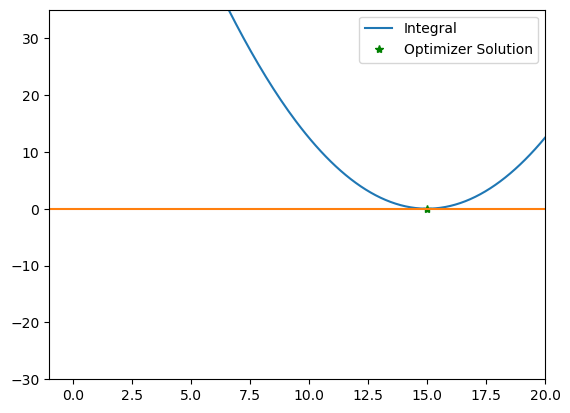

In [4]:
fig, ax = plt.subplots()
ax.set(xlim=[-1,20], ylim=[-30,35])

xs = np.linspace(-1,20,200)
ys = integral_function(xs, dh[0])
integral = ax.plot(xs, ys, label=f'Integral')[0]
solution = ax.plot(minres[0], cohesive_traction(minres[0]), 'g*', label=f'Optimizer Solution')[0]
x_axis = ax.plot([-20,25], [0,0])

ax.legend()

def update(frame):
    integral.set_ydata(integral_function(xs, dh[frame]))
    solution.set_xdata(minres[frame])
    solution.set_ydata(integral_function(minres[frame], dh[frame]))
    return (integral)

ani = animation.FuncAnimation(fig=fig, func=update, frames=50, interval=90, init_func=lambda: None)
ani.save(filename="example2.gif", writer="pillow")

plt.show()